In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
dataset = load_diabetes()
X = dataset["data"]
Y = dataset["target"]
feature_names = dataset["feature_names"]

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [4]:
weights = []
r2_score_list = []
## In Regularization/ feature selection techniques like Lasso Regression
alpha_list = [0, 0.1, 0.5, 0.65, 0.75, 0.8, 0.85, 2]

for alpha_1 in alpha_list:
  ## Model Fit
  model = Lasso(alpha = alpha_1)
  model.fit(X_train, Y_train)

  ## model Test
  Y_predicted = model.predict(X_test)

  ## model evaluation
  r2_score_list.append(r2_score(Y_test, Y_predicted))

  ## In some cases while using data-structures like a numpy array we have to use the method .to_list() method to convert them into python compatilble list
  weights.append(model.coef_.tolist())


<ipython-input-4-44b8c7acab67>:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.005e+05, tolerance: 2.090e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [5]:
print(weights)

[[-30.055698744469474, -191.41496276029713, 512.182266327769, 342.3250434652068, -750.2769331058975, 501.7135445323722, 75.88188617780266, 113.524913475911, 745.1173783615385, 83.31957231709606], [-0.0, -111.01836217570258, 498.3974063827898, 299.7175211811018, -13.550675033498452, -0.0, -201.31869675475517, 0.0, 463.5456670067768, 45.252404347901845], [0.0, -0.0, 449.1023874325656, 175.7883667626226, 0.0, 0.0, -57.94338378741206, 0.0, 417.1782612443218, 0.0], [0.0, -0.0, 420.80247492729586, 136.4246508772631, 0.0, 0.0, -17.680997851344223, 0.0, 396.111627313614, 0.0], [0.0, -0.0, 399.7183845420601, 110.55976861219276, 0.0, 0.0, -0.0, 0.0, 379.35631815255346, 0.0], [0.0, -0.0, 387.0382581775912, 98.00015257403558, 0.0, 0.0, -0.0, 0.0, 368.3581967939798, 0.0], [0.0, -0.0, 374.3584797441918, 85.44054705506042, 0.0, 0.0, -0.0, 0.0, 357.35992035596, 0.0], [0.0, 0.0, 23.211677427073468, 0.0, 0.0, 0.0, -0.0, 0.0, 46.26755865541385, 0.0]]


In [6]:
print(model.coef_)

[ 0.          0.         23.21167743  0.          0.          0.
 -0.          0.         46.26755866  0.        ]


In [8]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [16]:
# Create a SelectKBest object
selector = SelectKBest(mutual_info_regression, k=3)

# Fit and transform the data
x_new = selector.fit_transform(X, Y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names =[] #[feature_names[i] for i in selected_indices]
for i in selected_indices:
  selected_feature_names.append(feature_names[i])
print(selected_indices)
print(x_new.shape)
print("The top 3 selected Feature Names are:", selected_feature_names)

[2 8 9]
(442, 3)
The top 3 selected Feature Names are: ['bmi', 's5', 's6']


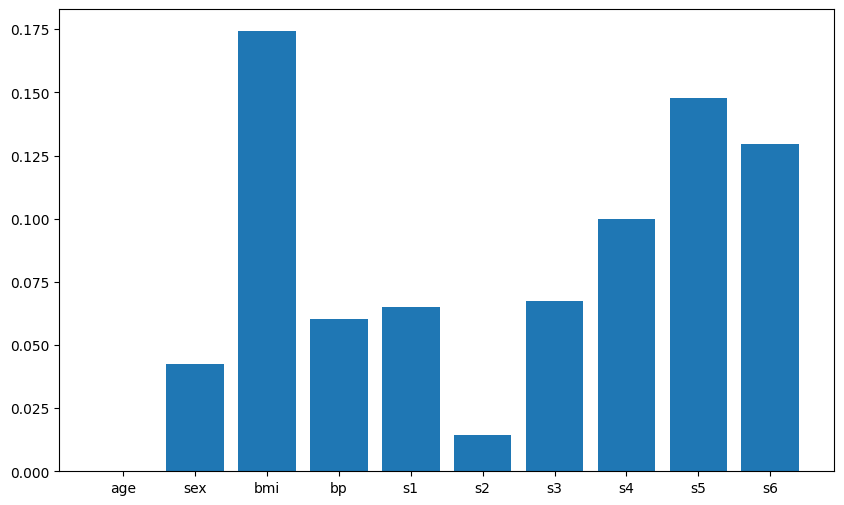

In [17]:
mi = mutual_info_regression(X, Y)
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

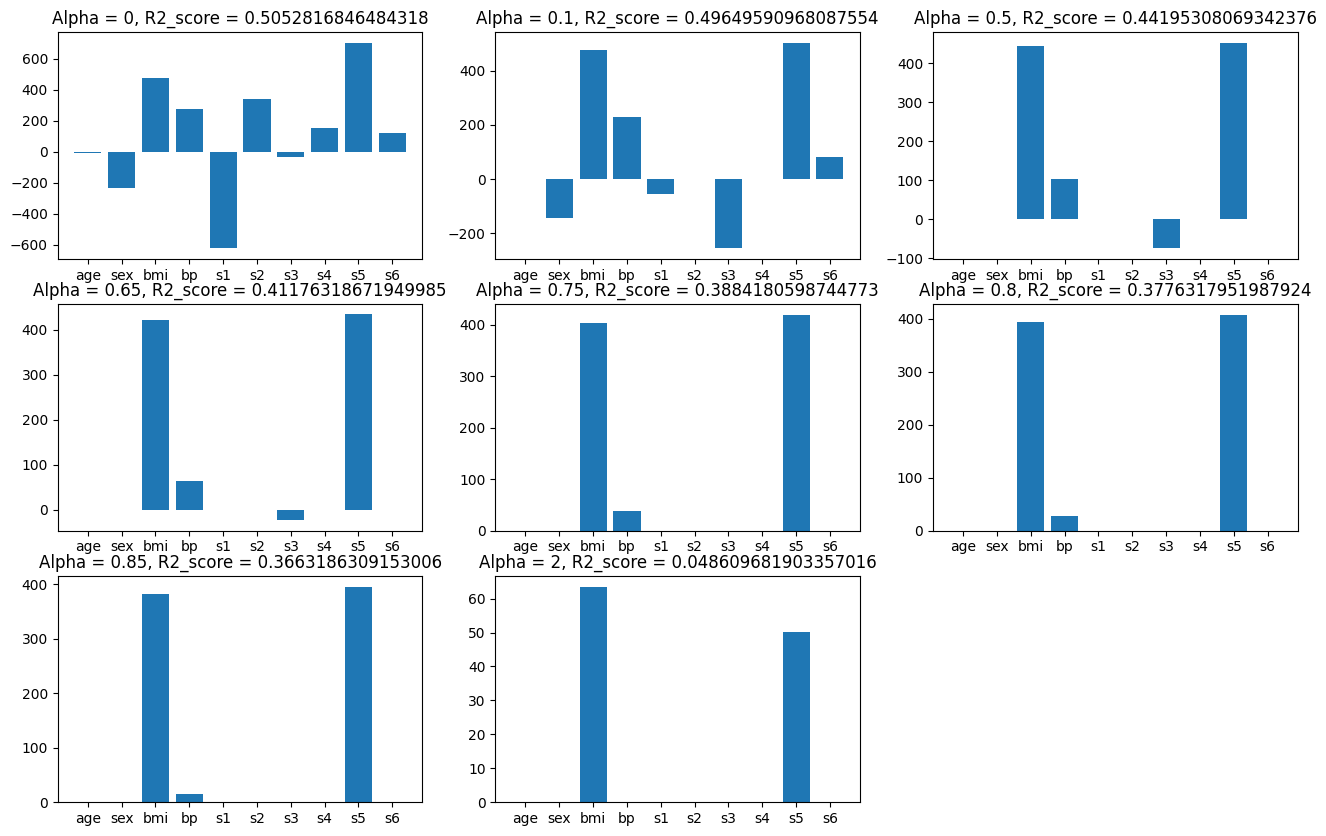

In [ ]:
# Visualizing Feature Selection

plt.figure(figsize=(16,10))

for i in range(len(alpha_list)):
  plt.subplot(3, 3, i+1)
  plt.bar(feature_names, weights[i])
  plt.title('Alpha = {}, R2_score = {}'.format(alpha_list[i], r2_score_list[i]))

plt.show()

AS THE VALUE OF ALPHA INCREASES THE NUMBER OR PARAMETER REDUCES, WHICH TRANSLATES THAT THE INCREASE IN ALPHA LEADS TO LESSER RELIANCE ON THE TRAINING DATA AND LEADS TO INCREASE IN BIAS.1
**AS WE CAN CLEARLY SEE THAT AS THE VALUE OF THE ALPHA INCREASES, SOME OF THE VALUE GETS AUTOMATICALLY CANCELLED OUT BY AS FORM OF A FEATURE SELECTION**

1. Hence we can clearly see that the 3 most important features in the dataset are bmi, bp and s5.
2. The